<a href="https://colab.research.google.com/github/pravallika-1305/WISE_ML/blob/main/DPhi/carInsurancePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 

# Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_train = pd.read_csv('/content/drive/My Drive/Data/Train_data.csv')
df_test = pd.read_csv('/content/drive/My Drive/Data/Test_data.csv')

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3102 entries, 0 to 3101
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  3102 non-null   float64
 1   job_type             3091 non-null   object 
 2   marital_status       3102 non-null   object 
 3   education_level      2989 non-null   object 
 4   default_or_not       3102 non-null   int64  
 5   balance_amt          3102 non-null   float64
 6   household_insurance  3102 non-null   int64  
 7   car_loan             3102 non-null   int64  
 8   communication        2559 non-null   object 
 9   last_contact_day     3102 non-null   int64  
 10  last_contact_month   3102 non-null   object 
 11  no_of_contacts       3102 non-null   int64  
 12  days_passed          3102 non-null   int64  
 13  prev_attempts        3102 non-null   int64  
 14  Outcome              751 non-null    object 
 15  call_start           3102 non-null   o

In [ ]:
df_train.head()
#missing values observed in some columns
#days passed has missing values as `-1`

,age,job_type,marital_status,education_level,default_or_not,balance_amt,household_insurance,car_loan,communication,last_contact_day,last_contact_month,no_of_contacts,days_passed,prev_attempts,Outcome,call_start,call_end,car_insurance
0,47.000000,blue-collar,married,primary,0,1112.000000,1,0,cellular,13,may,1,-1,0,NaN,10:22:20,10:24:29,0
1,46.031442,management,married,tertiary,0,1.312372,0,1,cellular,15,may,3,219,1,other,09:06:30,13:59:48,1
2,36.000000,services,single,NaN,0,281.000000,1,0,NaN,16,may,1,-1,0,NaN,13:18:41,13:27:16,1
3,32.000000,technician,single,secondary,0,540.000000,0,1,cellular,29,jan,1,-1,0,NaN,10:09:18,10:21:48,1
4,30.000000,admin.,single,secondary,0,315.000000,1,0,cellular,14,may,3,346,4,failure,12:12:30,12:27:14,1


In [ ]:
#check the total number of missing values
df_train.isna().sum()

age                       0
job_type                 11
marital_status            0
education_level         113
default_or_not            0
balance_amt               0
household_insurance       0
car_loan                  0
communication           543
last_contact_day          0
last_contact_month        0
no_of_contacts            0
days_passed               0
prev_attempts             0
Outcome                2351
call_start                0
call_end                  0
car_insurance             0
dtype: int64

In [ ]:
#convert age from `float-> int`
df_train["age"] = df_train['age'].astype(int)

In [ ]:
#Handling missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [ ]:
#replacing them with most requent values
df_train['job_type'] = imputer.fit_transform(df_train[['job_type']])
df_train['education_level'] = imputer.fit_transform(df_train[['education_level']])

In [ ]:
df_train.isna().sum()

age                       0
job_type                  0
marital_status            0
education_level           0
default_or_not            0
balance_amt               0
household_insurance       0
car_loan                  0
communication           543
last_contact_day          0
last_contact_month        0
no_of_contacts            0
days_passed               0
prev_attempts             0
Outcome                2351
call_start                0
call_end                  0
car_insurance             0
dtype: int64

In [ ]:
df_train = df_train.drop(['communication','Outcome','last_contact_day','last_contact_month'],axis = 1)

In [ ]:
df_train['days_passed'] = df_train['days_passed'].replace(-1, np.nan)

In [ ]:
df_train.isna().sum()

age                       0
job_type                  0
marital_status            0
education_level           0
default_or_not            0
balance_amt               0
household_insurance       0
car_loan                  0
no_of_contacts            0
days_passed            2219
prev_attempts             0
call_start                0
call_end                  0
car_insurance             0
dtype: int64

In [ ]:
df_train = df_train.drop(['days_passed'],axis = 1)

In [ ]:
df_train.isna().sum()

age                    0
job_type               0
marital_status         0
education_level        0
default_or_not         0
balance_amt            0
household_insurance    0
car_loan               0
no_of_contacts         0
prev_attempts          0
call_start             0
call_end               0
car_insurance          0
dtype: int64

In [ ]:
#Getting an integer value for call duration
df_train['call_duration'] = (pd.to_datetime(df_train['call_end']) - pd.to_datetime(df_train['call_start']))
df_train['call_duration'] = df_train['call_duration'].apply(lambda x: x.seconds) 
df_train = df_train.drop(['call_start', 'call_end'], axis=1)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3102 entries, 0 to 3101
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  3102 non-null   int64  
 1   job_type             3102 non-null   object 
 2   marital_status       3102 non-null   object 
 3   education_level      3102 non-null   object 
 4   default_or_not       3102 non-null   int64  
 5   balance_amt          3102 non-null   float64
 6   household_insurance  3102 non-null   int64  
 7   car_loan             3102 non-null   int64  
 8   no_of_contacts       3102 non-null   int64  
 9   prev_attempts        3102 non-null   int64  
 10  car_insurance        3102 non-null   int64  
 11  call_duration        3102 non-null   int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 290.9+ KB


In [ ]:
for col in df_train.columns:
  print(col +":" + str(df_train[col].unique()))
  #education_level, marital_status can be made categorical
  #job_type can also be converted to int

age:[47 46 36 32 30 37 21 52 49 41 45 33 40 57 48 35 27 50 58 34 51 73 26 54
 42 39 44 23 31 43 64 72 29 60 59 25 38 66 83 55 28 56 62 18 71 65 24 70
 77 53 61 67 22 63 69 82 78 81 19 79 80 75 68 92 86 20 76]
job_type:['blue-collar' 'management' 'services' 'technician' 'admin.' 'student'
 'retired' 'housemaid' 'unemployed' 'entrepreneur' 'self-employed']
marital_status:['married' 'single' 'divorced']
education_level:['primary' 'tertiary' 'secondary']
default_or_not:[0 1]
balance_amt:[1.11200000e+03 1.31237194e+00 2.81000000e+02 ... 4.40000000e+02
 2.75356686e+03 3.13600000e+03]
household_insurance:[1 0]
car_loan:[0 1]
no_of_contacts:[ 1  3  8  2  4 11  5  7 14  6  9 17 10 13 21 12 43 23 15 20 19 24 29 34
 26 18 32 25 16]
prev_attempts:[ 0  1  4  2 11  3  6  8  5 19  7 16 30  9 58 22 13 10 23 14 12 21]
car_insurance:[0 1]
call_duration:[  129 17598   515 ... 58295  1407   820]


In [ ]:
from sklearn.preprocessing import LabelEncoder
le_j = LabelEncoder()
df_train['job_type']=le_j.fit_transform(df_train['job_type'])
le_m = LabelEncoder()
df_train['marital_status']=le_m.fit_transform(df_train['marital_status'])
le_e = LabelEncoder()
df_train['education_level']=le_e.fit_transform(df_train['education_level'])

In [ ]:
df_train.head()

,age,job_type,marital_status,education_level,default_or_not,balance_amt,household_insurance,car_loan,no_of_contacts,prev_attempts,car_insurance,call_duration
0,47,1,1,0,0,1112.000000,1,0,1,0,0,129
1,46,4,1,2,0,1.312372,0,1,3,1,1,17598
2,36,7,2,1,0,281.000000,1,0,1,0,1,515
3,32,9,2,1,0,540.000000,0,1,1,0,1,750
4,30,0,2,1,0,315.000000,1,0,3,4,1,884


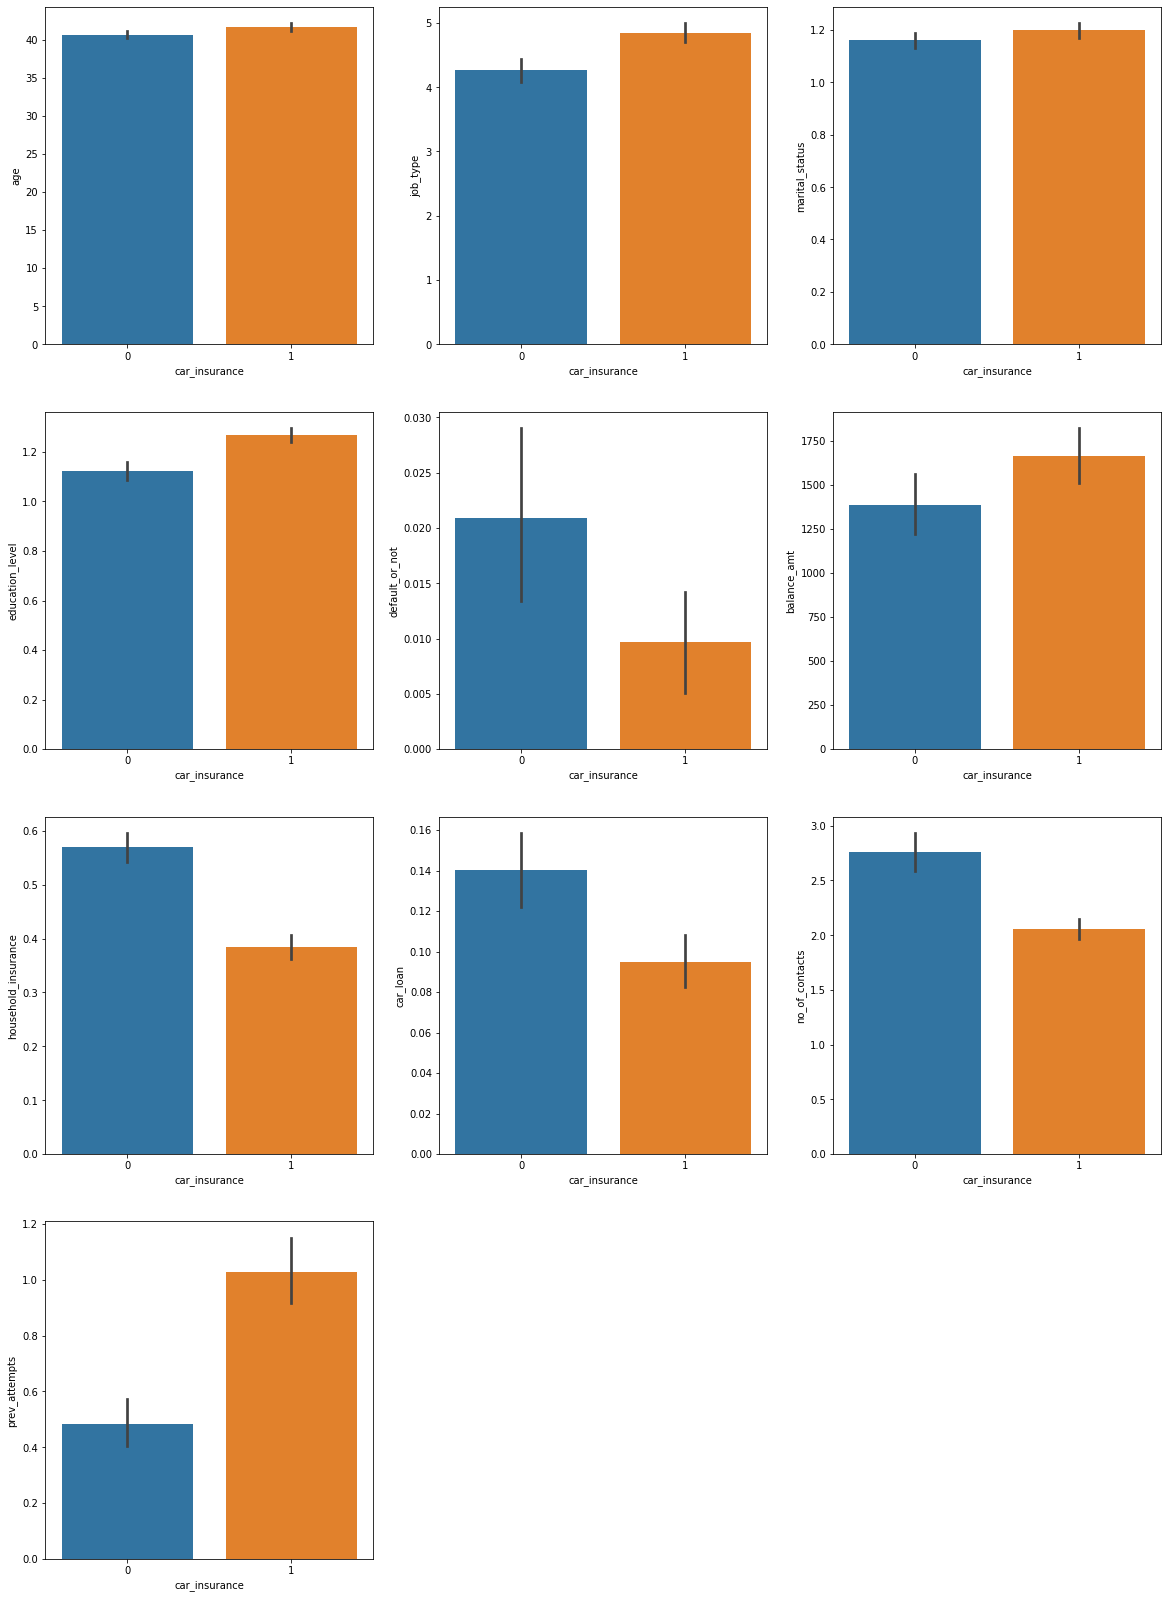

In [ ]:
def plot_bar(data, cols):
    fig = plt.figure(figsize=(20, 36))
    for loc, col in enumerate(cols):
        plt.subplot(5, 3, loc+1)
        sns.barplot(x=df_train["car_insurance"].astype(int), y=col, data=data)
plot_bar(df_train, df_train.columns[:-2])
plt.show()

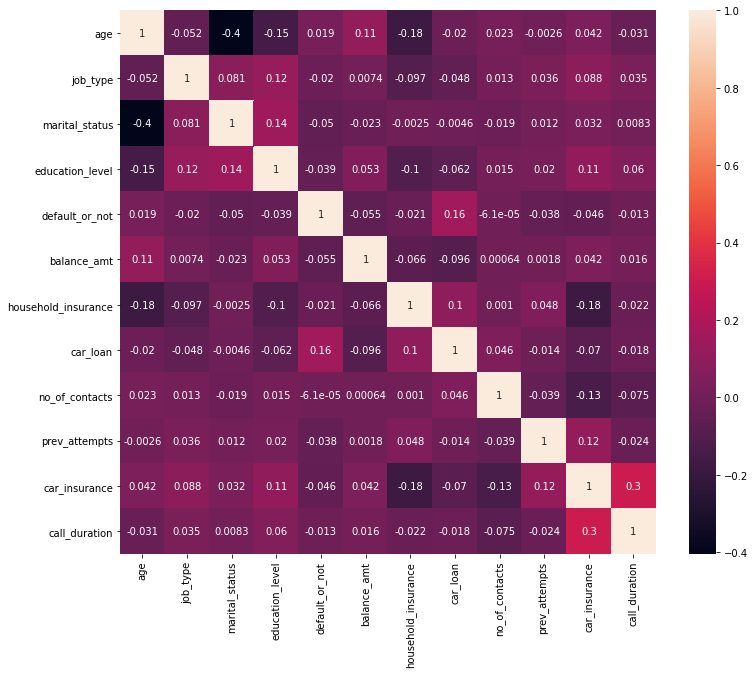

In [ ]:
plt.figure(figsize=(12,10))
cor = df_train.corr()
sns.heatmap(cor, annot=True)
plt.show()
#call_duration and car insurance are very related
#household_insurance and no_of_contacts are not related at all.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import SGDClassifier

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn. tree import DecisionTreeClassifier

from sklearn.metrics import roc_curve, auc, accuracy_score, roc_auc_score, f1_score, recall_score, precision_score

In [ ]:
X = df_train.drop(["car_insurance"], axis=1).to_numpy()
y = df_train['car_insurance'].values

In [ ]:
models = {"Logistic Regression": LogisticRegression(max_iter=10000), 
          "Random Forest": RandomForestClassifier(),
          "GradientBoostingClassifier" : GradientBoostingClassifier()}

Mean roc_auc_score Logistic Regression : 0.9014283201263031
Mean roc_auc_score Random Forest : 0.9376365876241468
Mean roc_auc_score GradientBoostingClassifier : 0.9214428344085587


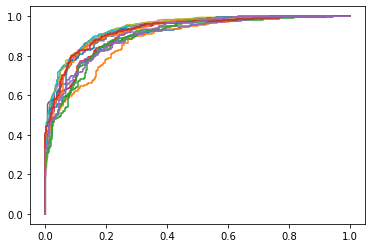

In [ ]:
# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True)

for name, model in models.items():
    
    # Create list for ROC AUC scores
    roc_auc_score_list = []
    
    for train_index, test_index in skf.split(X,y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)

        roc_auc_score_list.append(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))
        fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
        plt.plot(fpr, tpr)

      #Random Forest is giving good roc_auc_score, gradientBoosting seconds.


    print(f'Mean roc_auc_score {name} : {np.mean(roc_auc_score_list)}')

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

## DecisionTreeClassifier

In [ ]:
clf1 = DecisionTreeClassifier(criterion = 'entropy',random_state =0)
clf1.fit(X_train,y_train)

train_pred = clf1.predict(X_train)
test_pred = clf1.predict(X_test)

print(f"Train accuracy: {accuracy_score(y_train, train_pred)*100:.3f}%")
print(f"Test accuracy: {accuracy_score(y_test, test_pred)*100:.3f}%")
#overfitting of the data for decision tree

Train accuracy: 100.000%
Test accuracy: 80.193%


## Random Forest Classifier

In [ ]:
clf = RandomForestClassifier(n_estimators = 500,max_depth = 8,criterion ='gini',max_features=8,random_state = 42)
clf.fit(X_train,y_train)
#accuracy scoring
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

print(f"Train accuracy: {accuracy_score(y_train, train_pred)*100:.3f}%")
print(f"Test accuracy: {accuracy_score(y_test, test_pred)*100:.3f}%")

Train accuracy: 91.778%
Test accuracy: 84.058%


## Gradient Boost Classifier

In [ ]:
clf3 = GradientBoostingClassifier()
clf3.fit(X_train,y_train)

train_pred = clf3.predict(X_train)
test_pred = clf3.predict(X_test)

print(f"Train accuracy: {accuracy_score(y_train, train_pred)*100:.3f}%")
print(f"Test accuracy: {accuracy_score(y_test, test_pred)*100:.3f}%")
#comparatively good testing accuracy, so performing hyperparameter tuning.

Train accuracy: 88.029%
Test accuracy: 84.380%


## Light BGM Classifier

In [ ]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(boosting_type='gbdt', learning_rate=0.05, metric='auc')

lgbm.fit(X_train, y_train)

train_pred = lgbm.predict(X_train)
test_pred = lgbm.predict(X_test)
print(f"Train accuracy: {accuracy_score(y_train, train_pred)*100:.3f}%")
print(f"Test accuracy: {accuracy_score(y_test, test_pred)*100:.3f}%")

Train accuracy: 93.108%
Test accuracy: 85.024%


In [ ]:
from sklearn.model_selection import KFold
param_grid = {
    'num_leaves': [31, 127],
    'reg_alpha': [0.1, 0.5],
    'min_data_in_leaf': [30, 50, 100, 300, 400],
    'lambda_l1': [0, 1, 1.5],
    'lambda_l2': [0, 1]
    }
gkf = KFold(n_splits=5, shuffle=True, random_state=5).split(X=X_train, y=y_train)

In [ ]:
gsearch = GridSearchCV(estimator= lgbm, param_grid=param_grid, cv=gkf)
lgb_model = gsearch.fit(X=X_train, y=y_train)

In [ ]:
lgb_model.best_params_

{'lambda_l1': 0,
 'lambda_l2': 0,
 'min_data_in_leaf': 50,
 'num_leaves': 31,
 'reg_alpha': 0.1}

In [ ]:
lgb_model.best_score_

0.8512721490231712

In [ ]:

lgbm_1 = LGBMClassifier(boosting_type='gbdt', learning_rate=0.05, metric='auc',lambda_l1= 0,lambda_l2= 0,min_data_in_leaf = 9,num_leaves = 60,reg_alpha = 0.5)

lgbm_1.fit(X_train, y_train)
train_pred = lgbm_1.predict(X_train)
test_pred = lgbm_1.predict(X_test)
print(f"Train accuracy: {accuracy_score(y_train, train_pred)*100:.3f}%")
print(f"Test accuracy: {accuracy_score(y_test, test_pred)*100:.3f}%")

Train accuracy: 99.073%
Test accuracy: 86.151%


## CatBoost Classifier

In [ ]:
!pip3 install catboost

     |████████████████████████████████| 67.3MB 43kB/s 


In [ ]:
from catboost import CatBoostClassifier

clf_cat = CatBoostClassifier(
    iterations=5, 
    learning_rate=0.1, verbose=False)


clf_cat.fit(X_train, y_train)

train_pred = clf_cat.predict(X_train)
test_pred = clf_cat.predict(X_test)
print(f"Train accuracy: {accuracy_score(y_train, train_pred)*100:.3f}%")
print(f"Test accuracy: {accuracy_score(y_test, test_pred)*100:.3f}%")

Train accuracy: 82.547%
Test accuracy: 81.643%


In [ ]:
params = { 
    'n_estimators': [500,700,800,900,1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,9,10],
    'criterion' :['gini', 'entropy']
}

In [ ]:
from sklearn.model_selection import GridSearchCV
model = GridSearchCV(clf, params, cv=10, n_jobs=-1)
model.fit(X_train, y_train)

In [ ]:
test_data = pd.read_csv('/content/drive/MyDrive/Data/Test_data.csv') 
test_data.head()

,age,job_type,marital_status,education_level,default_or_not,balance_amt,household_insurance,car_loan,communication,last_contact_day,last_contact_month,no_of_contacts,days_passed,prev_attempts,Outcome,call_start,call_end
0,65.000000,retired,married,secondary,0,20806.0,0,0,telephone,8,apr,2,-1,0,NaN,12:22:13,12:30:56
1,36.000000,management,married,tertiary,0,900.0,1,0,NaN,15,may,2,-1,0,NaN,17:59:45,18:07:40
2,37.000000,management,married,tertiary,0,6771.0,0,0,cellular,7,sep,1,186,1,success,14:05:19,14:10:56
3,30.065066,management,single,tertiary,0,0.0,0,0,cellular,14,may,2,-1,0,NaN,17:33:27,09:47:54
4,41.000000,management,married,tertiary,0,328.0,1,0,cellular,29,jul,12,-1,0,NaN,14:40:26,14:41:31


In [ ]:
test_data["age"] = test_data['age'].astype(int)

In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [ ]:
#replacing them with most requent values
test_data['job_type'] = imputer.fit_transform(test_data[['job_type']])
test_data['education_level'] = imputer.fit_transform(test_data[['education_level']])

In [ ]:
test_data = test_data.drop(['communication','Outcome','last_contact_day','last_contact_month'],axis = 1)

In [ ]:
test_data['call_duration'] = (pd.to_datetime(test_data['call_end']) - pd.to_datetime(test_data['call_start'])).apply(lambda x: x.seconds)
test_data = test_data.drop(['call_start', 'call_end'], axis=1)

In [ ]:
test_data['days_passed'] = test_data['days_passed'].replace(-1, np.nan)
test_data = test_data.drop(['days_passed'],axis = 1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencodert = LabelEncoder()
test_data['job_type'] = labelencodert.fit_transform(test_data['job_type'])
let_1 = LabelEncoder()
test_data['marital_status']=let_1.fit_transform(test_data['marital_status'])
let_2 = LabelEncoder()
test_data['education_level']=let_2.fit_transform(test_data['education_level'])
test_data.head()

,age,job_type,marital_status,education_level,default_or_not,balance_amt,household_insurance,car_loan,no_of_contacts,prev_attempts,call_duration
0,65,5,1,1,0,20806.0,0,0,2,0,523
1,36,4,1,2,0,900.0,1,0,2,0,475
2,37,4,1,2,0,6771.0,0,0,1,1,337
3,30,4,2,2,0,0.0,0,0,2,0,58467
4,41,4,1,2,0,328.0,1,0,12,0,65


In [ ]:
target = lgbm_1.predict(test_data)

In [ ]:
res = pd.DataFrame(target)
res.index = test_data.index
res.columns = ["prediction"]

from google.colab import files
res.to_csv('target_car_new.csv')
files.download('target_car_new.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>